# Kickstarter Projects
# Final Project: Humza Rabbani

In [824]:
import pandas as pd
import csv
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
from matplotlib import figure
import plotly.plotly as py
import plotly.graph_objs as go
import math
from sklearn import linear_model
from mlxtend.preprocessing import standardize
from sklearn import preprocessing

In [825]:
original_data = pd.read_csv('/Users/humrabb/Downloads/kickstarter-projects/ks-projects-201801.csv', encoding = "ISO-8859-1")
pd.options.display.max_columns = 26
pd.options.display.max_info_columns 

100

# Introduction
For my final project, I analyzed a dataset about Kickstarter projects. I made graphs, did calculations, and used logistic regression to uncover patterns and interesting findings. Below is a complete list of the columns the original dataframe contained:

# Columns

ID: internal kickstarter id

name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.

category: category

main_category: category of campaign

currency: currency used to support

deadline: deadline for crowdfunding

goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.

launched: date launched

pledged: amount pledged by "crowd"

state: Current condition the project is in

backers: number of backers

country: country pledged from

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).


In [826]:
original_data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


First, I realized that the usd_pledged column was redundant, since it was simply a less accurate version of the usd_pledge_real column. Because of this, I chose to drop the column.

In [827]:
data = original_data.drop(['usd pledged'], axis = 1)

In [828]:
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00


In [829]:
data.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

Once I created a dataframe that would be better to analyze, I did some basic analysis. To figure out what I should take a closer look at, I wrote down the names of the columns that I thought would be most helpful:

category

currency

goal

pledged

state

backers

country

usd pledged

usd goal real

I decided to take a look at all the subcategories:

In [830]:
allCategories = data.category.unique()
allCategories

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

There were 159 unique subcategories that projects were in. This was a lot, so I decided to do the same thing with the main_category column instead.

In [831]:
mainCategories = data.main_category.unique()
mainCategories

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [832]:
len(mainCategories)

15

This was a lot more helpful - there were only 15 unique values in the 'main_Category' column. I decided to do some deeper analysis to see the breakdown of the different categories:

In [833]:
categoryCount = data['main_category'].value_counts()

In [834]:
categoryCount

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Film & Video and Music had by far the most projects, while Dance had the least. I decided to represent this in a bar chart. To do this, I used the categoryCount variable to create variables for each category containing the amount of projects. I then created a list with all the 'heights', and used that to create my bar chart. There was probably an easier and less time-consuming way to do this.

In [835]:
#Bar chart of category and count
#for i in range(0,15):
    #print("y_categories[" + str(i) + "]")
    
a=y_categories[0]
b=y_categories[1]
c=y_categories[2]
d=y_categories[3]
e=y_categories[4]
f=y_categories[5]
g=y_categories[6]
h=y_categories[7]
er=y_categories[8]
j=y_categories[9]
k=y_categories[10]
l=y_categories[11]
m=y_categories[12]
n=y_categories[13]
o=y_categories[14]

In [836]:
heights = [a,b,c,d,e,f,g,h,er,j,k,l,m,n,o]

In [837]:
heights

[63585,
 51918,
 39874,
 35231,
 32569,
 30070,
 28153,
 24602,
 22816,
 10913,
 10819,
 10779,
 8809,
 4755,
 3768]

Text(0.5,1,'Amount of Projects per Category')

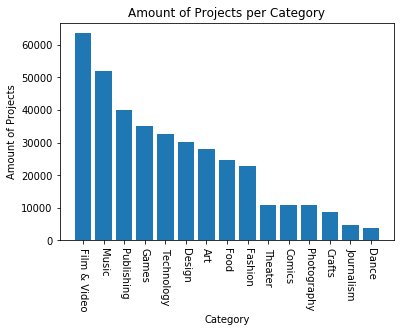

In [838]:
heights = [a,b,c,d,e,f,g,h,er,j,k,l,m,n,o]
plt.bar(range(0, 15), [a,b,c,d,e,f,g,h,er,j,k,l,m,n,o])
plt.xticks(range(0, 15),('Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'), rotation=-90)
plt.xlabel("Category")
plt.ylabel("Amount of Projects")
plt.title("Amount of Projects per Category")

I decided to do some deeper analysis into this. Was there a reason more people were starting projects in the Film & Video and Music categories? One theory I had was that these projects are more likely to be funded/reach their goal. To look into this, I took a look at the percentage of projects that were funded for each category.

In [839]:
#Variables for each category that I could call to get the dataframe of each category:
createCategories = mainCategories.tolist()
createCategories

for i in createCategories:
    print("data[ (data['main_category'] == '" + str(i) + "')],")

data[ (data['main_category'] == 'Publishing')],
data[ (data['main_category'] == 'Film & Video')],
data[ (data['main_category'] == 'Music')],
data[ (data['main_category'] == 'Food')],
data[ (data['main_category'] == 'Design')],
data[ (data['main_category'] == 'Crafts')],
data[ (data['main_category'] == 'Games')],
data[ (data['main_category'] == 'Comics')],
data[ (data['main_category'] == 'Fashion')],
data[ (data['main_category'] == 'Theater')],
data[ (data['main_category'] == 'Art')],
data[ (data['main_category'] == 'Photography')],
data[ (data['main_category'] == 'Technology')],
data[ (data['main_category'] == 'Dance')],
data[ (data['main_category'] == 'Journalism')],


I created a list of all the categories called 'loopCategories' that I could loop over to create variables for each category:

In [840]:
loopCategories = [data[ (data['main_category'] == 'Publishing')],
data[ (data['main_category'] == 'Film & Video')],
data[ (data['main_category'] == 'Music')],
data[ (data['main_category'] == 'Food')],
data[ (data['main_category'] == 'Design')],
data[ (data['main_category'] == 'Crafts')],
data[ (data['main_category'] == 'Games')],
data[ (data['main_category'] == 'Comics')],
data[ (data['main_category'] == 'Fashion')],
data[ (data['main_category'] == 'Theater')],
data[ (data['main_category'] == 'Art')],
data[ (data['main_category'] == 'Photography')],
data[ (data['main_category'] == 'Technology')],
data[ (data['main_category'] == 'Dance')],
data[ (data['main_category'] == 'Journalism')]]

In the cell below, I used the 'loopCategories' list to create a variable for each category.

In [841]:
publishing,filmvideo,music,food,design,crafts,games,comics,fashion,theater,art,photography,technology,dance,journalism = [i for i in loopCategories]

In [842]:
allCategories = [publishing,filmvideo,music,food,design,crafts,games,comics,fashion,theater,art,photography,technology,dance,journalism]
publishing['state'].value_counts(normalize=True)*100
allPercentages = []
for i in allCategories:
    allPercentages.append(i['state'].value_counts(normalize=True)*100)

In [843]:
#Creating 'percentage' variables for each category
publishingPercent = allPercentages[0]
filmvideoPercent = allPercentages[1]
musicPercent = allPercentages[2]
foodPercent = allPercentages[3]
designPercent = allPercentages[4]
craftsPercent = allPercentages[5]
gamesPercent = allPercentages[6]
comicsPercent = allPercentages[7]
fashionPercent = allPercentages[8]
theaterPercent = allPercentages[9]
artPercent = allPercentages[10]
photographyPercent = allPercentages[11]
technologyPercent = allPercentages[12]
dancePercent = allPercentages[13]
journalismPercent = allPercentages[14]

In [844]:
#strings for each category to use in charts
categoryStrings = ['publishing','filmvideo','music','food','design','crafts','games','comics','fashion','theater','art','photography','technology','dance','journalism']
categoryStrings

['publishing',
 'filmvideo',
 'music',
 'food',
 'design',
 'crafts',
 'games',
 'comics',
 'fashion',
 'theater',
 'art',
 'photography',
 'technology',
 'dance',
 'journalism']

I wrote a for loop that calculated and printed out the percentage of successful projects for every category.

In [845]:
for idx, val in enumerate(categoryStrings):
    currentItem = allPercentages[idx]
    print ("The percent of projects that were successful in the " + str(val) + " category is: " + str(round((100-(currentItem['failed'] + currentItem['canceled'] + currentItem['suspended'])), 2)))

The percent of projects that were successful in the publishing category is: 32.76
The percent of projects that were successful in the filmvideo category is: 39.02
The percent of projects that were successful in the music category is: 51.45
The percent of projects that were successful in the food category is: 25.48
The percent of projects that were successful in the design category is: 36.11
The percent of projects that were successful in the crafts category is: 24.87
The percent of projects that were successful in the games category is: 36.35
The percent of projects that were successful in the comics category is: 54.7
The percent of projects that were successful in the fashion category is: 25.62
The percent of projects that were successful in the theater category is: 60.26
The percent of projects that were successful in the art category is: 41.57
The percent of projects that were successful in the photography category is: 31.12
The percent of projects that were successful in the techno

In [846]:
finalPercentages = []
for i in allPercentages:
    finalPercentages.append(round((100-(i['failed'] + i['canceled'] + i['suspended'])), 2))

Finally, I made a bar chart showing the percentage of successful projects per category.

Text(0,0.5,'Percentage')

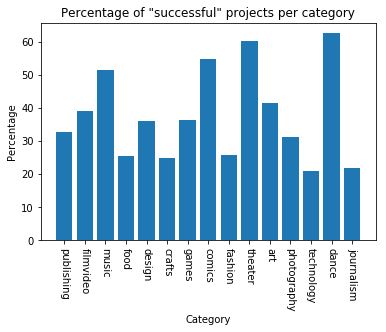

In [847]:
plt.bar(range(0,15), finalPercentages)
plt.xticks(range(0,15), categoryStrings, rotation = -90)
plt.title('Percentage of "successful" projects per category')
plt.xlabel('Category')
plt.ylabel('Percentage')

I wanted to take a look at the most successful categories and see if there was something different about the most and least successful categories. The most successful category was dance, while the least successful was technology. I was surprised by the fact that technology projects were the least successful, so I took a closer look to see why. The first comparison I did was the average backers per project for dance (most successful) and technology (least successful), to see if there was a clear difference between the two ends of the spectrum.

Dance: 42.801220806794056
Technology: 164.4666093524517


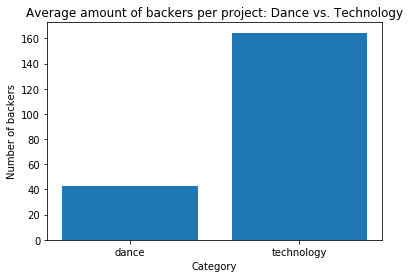

In [848]:
#Comparing dance and technology categories
#Comparing average number of backers:
backersTechDance = [dance['backers'].mean(), technology['backers'].mean()]
techDanceLabels = ['dance', 'technology']
plt.bar(range(0,2), backersTechDance)
plt.xticks(range(0,2), techDanceLabels)
plt.title('Average amount of backers per project: Dance vs. Technology')
plt.xlabel('Category')
plt.ylabel('Number of backers')
print ("Dance: " + str(dance['backers'].mean()))
print ("Technology: " + str(technology['backers'].mean()))

Wow! Dance is the most successful category and technology is the least, yet technology has almost four times the average amount of backers per project. This was extremely surprising, and I wanted to dig even deeper into the difference between successful and not successful projects.

I thought that something that might draw a line between more successful and less successful projects was the average goal per project. I thought this could help me see if certain categories tended to have bigger vs. smaller projects, which is why they got funded more easily. To do this, I compared the dance and technology categories again, but this time, I compared the average goal per project in the two categories.

Dance: $9588.33
Technology: $102288.54


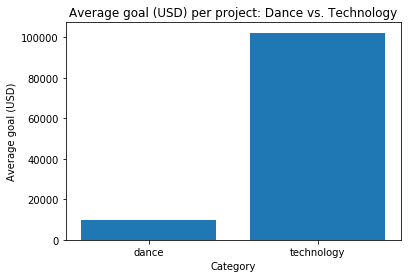

In [849]:
#Comparing average goal:
goalTechDance = [dance['usd_goal_real'].mean(),technology['usd_goal_real'].mean()]
goalLabels = ['dance', 'technology']
x_labels = [dance['usd_goal_real'].mean(),technology['usd_goal_real'].mean()]
plt.bar(range(0,2), goalTechDance)
plt.xticks(range(0,2), goalLabels)
plt.title('Average goal (USD) per project: Dance vs. Technology')
plt.xlabel('Category')
plt.ylabel('Average goal (USD)')
print ("Dance: " + "$" + str(round(dance['usd_goal_real'].mean(), 2)))
print ("Technology: " + "$" + str(round(technology['usd_goal_real'].mean(), 2)))

This was definitely a telling sign for me: this graph showed that the average technology project was much bigger (required much more money) than the average dance project, which could explain why only about 20% of technology projects were successful even though technology had more backers per project. This makes sense - it probably costs a lot more to make a new technology project than it does to put on a dance show. To make sure I was on the right track with this thinking, I also compared journalism (2nd-lowest success rate) with the 2nd-most successful category, theater.  

Theater: 47.0
Journalism: 38.0


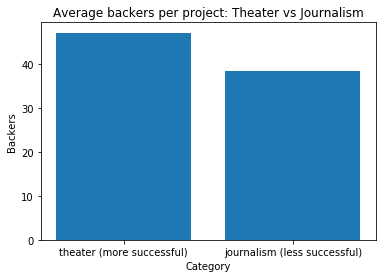

In [850]:
#Average backers per project: journalism vs theater
backersTheaterJournal = [theater['backers'].mean(), journalism['backers'].mean()]
theaterJournalLabels = ['theater (more successful)', 'journalism (less successful)']
plt.bar(range(0,2), backersTheaterJournal)
plt.xticks(range(0,2), theaterJournalLabels)
plt.title('Average backers per project: Theater vs Journalism')
plt.xlabel('Category')
plt.ylabel('Backers')
print ("Theater: " + str(round(theater['backers'].mean())))
print("Journalism: " + str(round(journalism['backers'].mean())))

This time, the more successful category also had more backers per project. However, I was still convinced that the size and goal of the projects had a large impact on success. I created another bar graph showing the average goal per project of theater vs. journalism.

Text(0,0.5,'Average Goal (USD)')

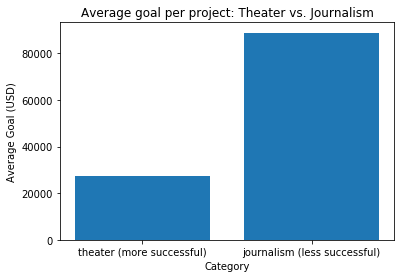

In [851]:
goalTheaterJournal  = [theater['goal'].mean(), journalism['goal'].mean()]
goalLabelsTJ = ['theater (more successful)', 'journalism (less successful)']
plt.bar(range(0,2), goalTheaterJournal)
plt.xticks(range(0,2), goalLabelsTJ)
plt.title('Average goal per project: Theater vs. Journalism')
plt.xlabel('Category')
plt.ylabel('Average Goal (USD)')


From these comparisons, it was clear that less successful projects all tended to have much higher goals. To help vizualize this better, I made an additional chart to display next to my original "successful projects" chart showing the average goal per project for each category.

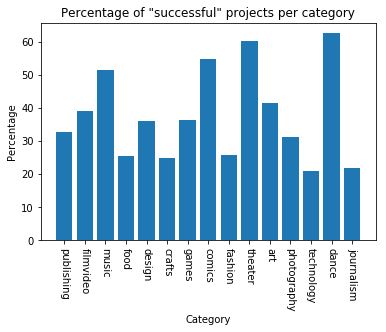

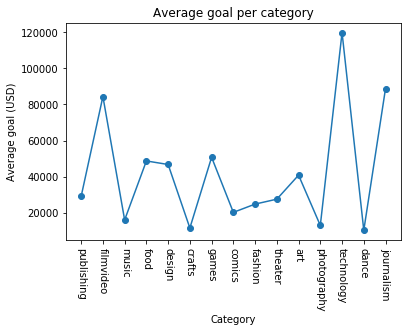

In [852]:
averageGoals = [i['goal'].mean() for i in loopCategories]
labels = categoryStrings
plt.figure(1)
plt.bar(range(0,15), finalPercentages)
plt.xticks(range(0,15), categoryStrings, rotation = -90)
plt.title('Percentage of "successful" projects per category')
plt.xlabel('Category')
plt.ylabel('Percentage')

plt.figure(2)
plt.plot(labels, averageGoals, marker = 'o')
plt.xticks(labels, rotation = -90)
plt.title('Average goal per category')
plt.xlabel('Category')
plt.ylabel('Average goal (USD)')
plt.show()





As this graph clearly displays, the least successful categories tended to have the highest goals per project. Meanwhile, categories with high success rates such as dance and theater tended to have lower goals.

Next, I took a look at was the breakdown of projects by currency - I was interested in seeing the breakdown of projects by currency.

In [853]:
publishing['currency'].value_counts()

USD    32050
GBP     3321
CAD     1582
EUR     1268
AUD      857
SEK      208
NZD      179
MXN      156
DKK       85
NOK       76
SGD       37
CHF       36
HKD       18
JPY        1
Name: currency, dtype: int64

Only one project was funded using Japanese Yen, while most projects used USD.

In [854]:
currencies = data.currency.unique()
currencies

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

I looked up these currencies and wrote the full names:

Pound

US Dollar

Canadian Dollar

Australian Dollar

Norwegian Krone

Euro

Mexican Peso

Swedish Krona

New Zealand Dollar

Swiss Franc

Danish Krone

Hong Kong Dollar

Singapore Dollar

Japanese Yen

To represent this in a graph, I made a bar graph showing the projects per currency.

In [855]:
currencyCount = data['currency'].value_counts()
currencyCount[0:14]
listCurrencyCount = currencyCount.values.tolist()

In [856]:
fullCurrencies = ['US Dollar','Pound', 'Canadian Dollar', 'Australian Dollar', 'Norwegian Krone', 'Euro', 'Mexican Peso', 'Swedish Krona', 'New Zealand Dollar', 'Swiss Franc', 'Danish Krone', 'Hong Kong Dollar', 'Singapore Dollar', 'Japanese Yen']

In [857]:
currencyPercentages = []
for i in currencyCount:
    currencyPercentages.append((i/data.shape[0])*100)

In [858]:
currencyPercentages

[78.00248771328444,
 9.013867284985778,
 4.596459630117704,
 3.951291524609083,
 2.099503249608489,
 0.47219016481760734,
 0.4626829802910783,
 0.389530477128619,
 0.2981558702903125,
 0.20281993656595215,
 0.19067186744872064,
 0.1632066677054146,
 0.14656909478398883,
 0.010563538362810007]

Text(0.5,1,'Amount of Projects per Currency')

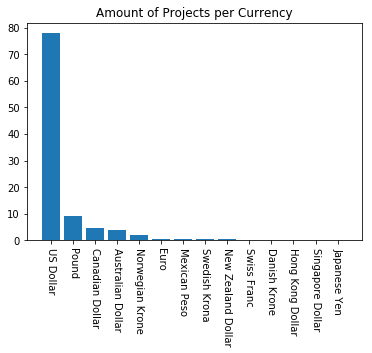

In [859]:
plt.bar(range(0,14), currencyPercentages)
plt.xticks(range(0,14), fullCurrencies, rotation = -90)
plt.title('Amount of Projects per Currency')

I was also interested in seeing the breakdown of projects by COUNTRY, so I made a pie chart to show the percentage of projects per country.

In [860]:
#Projects by country
countryCounts = data['country'].value_counts()
trueCountries = []
for i in range(0,23):
    trueCountries.append(countryCounts[i])
    
trueCountries

[292627,
 33672,
 14756,
 7839,
 4171,
 3797,
 2939,
 2878,
 2868,
 2276,
 1757,
 1752,
 1447,
 1113,
 811,
 761,
 708,
 618,
 617,
 597,
 555,
 62,
 40]

In [861]:
countryCounts

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [862]:
data.country.unique()
orderedCountries = ['US','GB', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'] 

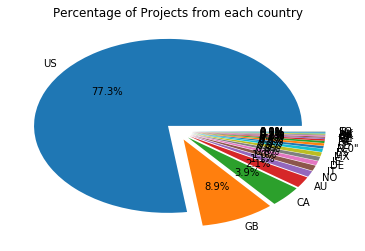

In [863]:
labels = 'US', 'GB', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"', 'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG','JP'
sizes = trueCountries
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, labels = labels, explode = explode, autopct='%1.1f%%')
plt.title('Percentage of Projects from each country')
plt.show()

To continue my breakdown of projects by country, I analyzed the average 'goal' of projects by country.

In [864]:
countryFrames = []
for i in orderedCountries:
    countryFrames.append(data[ (data['country'] == i)])


In [865]:

for idx, val in enumerate(orderedCountries):
    currentCountry = countryFrames[idx]
    print(str(val) + ": " + str(round(currentCountry['usd_goal_real'].mean())))

US: 44035.0
GB: 42774.0
CA: 44408.0
AU: 58108.0
NO: 67440.0
IT: 78808.0
DE: 75208.0
IE: 47406.0
MX: 14870.0
ES: 52579.0
N,0": 5097.0
SE: 40994.0
FR: 81047.0
NL: 109507.0
NZ: 25572.0
CH: 271282.0
AT: 44652.0
DK: 35581.0
BE: 37322.0
HK: 23866.0
LU: 33783.0
SG: 15475.0
JP: 16597.0


I plotted this in a bar graph, making sure to use the column that converted all the values to USD:

In [866]:
#appending all values into a list:
orderedGoals = []
for i in countryFrames:
    orderedGoals.append(round(i['usd_goal_real'].mean()))


Text(0,0.5,'Average goal (USD)')

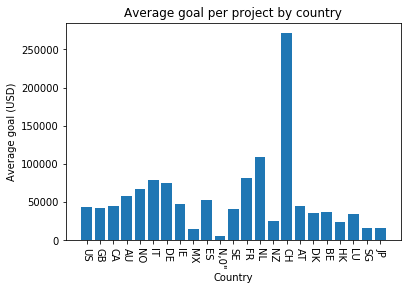

In [867]:
len(orderedGoals)
plt.bar(range(0,23), orderedGoals)
plt.xticks(range(0,23), orderedCountries, rotation = -90)


plt.title("Average goal per project by country")
plt.xlabel("Country")
plt.ylabel("Average goal (USD)")

I found it interesting that China had by far the highest average goal, with the Netherlands coming in second even though both countries were ranked very low when it came to number of projects.

To conclude my analysis, I built a logistic regression model to predict if a project would be successful or not.

First step - make a new dataframe that excludes 'undefined' and 'live' projects - these projects cannot be identified as successful or failed, so I decided not to include these rows when building the model.

In [868]:
#LOGISTIC REGRESSION TO PREDICT IF A PROJECT IS SUCCESSFUL OR NOT

regressionData = data[ (data['state'] != 'undefined') & (data['state'] != 'live')]
regressionData['state'].value_counts()


failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

Next, I needed to drop the categories that were strings or had no information value. If I had more time, I would have figured out a way to convert the non-numeric values to numbers - instead, I ended up dropping a few columns that could have been useful when training the model.


In [869]:
regression = regressionData.drop(['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'launched'], 1)
regression

,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000.0,0.00,failed,0,GB,0.00,1533.95
1,30000.0,2421.00,failed,15,US,2421.00,30000.00
2,45000.0,220.00,failed,3,US,220.00,45000.00
3,5000.0,1.00,failed,1,US,1.00,5000.00
4,19500.0,1283.00,canceled,14,US,1283.00,19500.00
5,50000.0,52375.00,successful,224,US,52375.00,50000.00
6,1000.0,1205.00,successful,16,US,1205.00,1000.00
7,25000.0,453.00,failed,40,US,453.00,25000.00
8,125000.0,8233.00,canceled,58,US,8233.00,125000.00
9,65000.0,6240.57,canceled,43,US,6240.57,65000.00


In [870]:
#Splitting the data into successful and failed dataframes
successful = regression[ (regression['state'] == 'successful')]
failed = regression[ (regression['state'] != 'successful')]

In [871]:
#Setting the "state" column in 'successful' to be one and setting it to be zero in 'failed'
successful[['state']] = 1
failed[['state']] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [872]:
regressionFrames = [successful, failed]
overall = pd.concat(regressionFrames)

In [873]:
#shuffling rows
overall = overall.sample(frac = 1)
overall

,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real
240625,10000.0,10680.00,1,127,US,10680.00,10000.00
326401,9500.0,4362.00,0,149,AU,3277.97,7139.10
356098,6500.0,58.00,0,2,US,58.00,6500.00
366590,100000.0,3290.00,0,35,CA,2554.15,77633.72
115253,10000.0,45.00,0,2,US,45.00,10000.00
55862,3000.0,0.00,0,0,US,0.00,3000.00
13226,20000.0,29927.00,1,152,US,29927.00,20000.00
294470,20000.0,24895.77,1,228,US,24895.77,20000.00
177654,30000.0,30966.00,1,84,US,30966.00,30000.00
200224,7500.0,560.00,0,6,US,560.00,7500.00


I felt like the 'country' column could be important in helping the model decide between successful and failed projects, so I converted all the unique values in the 'country' column to unique numbers.

In [874]:
#converting "country" column to numbers to make it work with the logistic regression:
column_name = 'country'

usa = overall.country == 'US'
overall.loc[usa, column_name] = 1

gb = overall.country == 'GB'
overall.loc[gb, column_name] = 2

ca = overall.country == 'CA'
overall.loc[ca, column_name] = 3

au = overall.country == 'AU'
overall.loc[au, column_name] = 4

de = overall.country == 'DE'
overall.loc[de, column_name] = 5

se = overall.country == 'SE'
overall.loc[se, column_name] = 6

fr = overall.country == 'FR'
overall.loc[fr, column_name] = 7

it = overall.country == 'IT'
overall.loc[it, column_name] = 8

nl = overall.country == 'NL'
overall.loc[nl, column_name] = 9

mx = overall.country == 'MX'
overall.loc[mx, column_name] = 10

hk = overall.country == 'HK'
overall.loc[hk, column_name] = 11

no = overall.country == 'N,0"'
overall.loc[no, column_name] = 12

es = overall.country == 'ES'
overall.loc[es, column_name] = 13

nz = overall.country == 'NZ'
overall.loc[nz, column_name] = 14

ie = overall.country == 'IE'
overall.loc[ie, column_name] = 15

no2 = overall.country == 'NO'
overall.loc[no2, column_name] = 16

be = overall.country == 'BE'
overall.loc[be, column_name] = 17

sg = overall.country == 'SG'
overall.loc[sg, column_name] = 18

dk = overall.country == 'DK'
overall.loc[dk, column_name] = 19

lu = overall.country == 'LU'
overall.loc[lu, column_name] = 20

ch = overall.country == 'CH'
overall.loc[ch, column_name] = 21

at = overall.country == 'AT'
overall.loc[at, column_name] = 22

jp = overall.country == 'JP'
overall.loc[jp, column_name] = 23


#for i in range(0,14):
       #print ("overall.loc[x, column_name] == y")

In order to create two separate dataframes (one to train and one to test the model) I did an 80-20 split on my large 'overall' dataframe.

In [875]:
split = np.random.rand(len(overall)) < 0.8
train = overall[split]
test = overall[~split]
train.columns

Index(['goal', 'pledged', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')

Finally, I could use the 'train' dataframe to train the logistic regression model.

In [876]:
model = linear_model.LogisticRegression()
model.fit(train[['goal', 'pledged', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real']], train[['state']])

print('Intercept: {0}  Parameters: {1}'.format(model.intercept_, model.coef_))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Intercept: [3.15961906e-05]  Parameters: [[-2.59400285e-05  2.73879886e-05  2.04723649e-03  8.84982823e-06
   1.56368410e-03 -1.32981182e-03]]


The parameters the logistic regression model returned seemed to suggest that the third parameter (number of backers) has the most predictive power. Practically speaking, this makes sense- the more backers there are for a project, the more demand there is for that product, the more financial contributions there are, therefore the more likely the project is to succeed.

To create the dataset I needed to test my model, I had to drop the "state" column from the dataframe, because that's what the model was supposed to predict.

In [877]:
finaltest = test.drop(['state'], 1)
finaltest

,goal,pledged,backers,country,usd_pledged_real,usd_goal_real
326401,9500.0,4362.00,149,4,3277.97,7139.10
366590,100000.0,3290.00,35,3,2554.15,77633.72
115253,10000.0,45.00,2,1,45.00,10000.00
55862,3000.0,0.00,0,1,0.00,3000.00
294470,20000.0,24895.77,228,1,24895.77,20000.00
33575,8000.0,10.00,1,14,8.26,6608.84
2308,15000.0,40.00,1,1,40.00,15000.00
191350,10000.0,5.00,1,1,5.00,10000.00
18434,16000.0,27.00,2,1,27.00,16000.00
219813,8000.0,9076.00,72,1,9076.00,8000.00


In [878]:
input_cols = ['goal', 'pledged', 'backers', 'country','usd_pledged_real', 'usd_goal_real']
predictions = model.predict(finaltest[input_cols])
probabilities = model.predict_proba(finaltest[input_cols])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning:

overflow encountered in exp



I ran the logistic regression on the entire 'test' dataframe, creating a new column in the dataframe with the model's predictions for each row.

In [879]:
finaltest['preds'] = predictions

In [880]:
finaltest['preds']

326401    0
366590    0
115253    0
55862     0
294470    1
33575     0
2308      0
191350    0
18434     0
219813    1
153419    0
64166     0
234972    0
12393     1
179542    1
27834     1
202219    0
88812     1
312834    0
155628    1
20672     0
344958    1
241375    0
151738    1
377985    1
81004     0
80025     0
288049    0
114358    0
154922    1
         ..
52164     0
163169    1
20902     1
234235    0
21884     0
179397    1
104946    0
14846     1
7172      0
139946    0
339080    0
170415    1
233794    0
363690    0
129386    1
78375     0
143435    0
256048    0
14711     0
78231     0
236381    0
265399    0
216220    0
314156    1
71888     0
374794    0
267283    0
192076    0
316360    0
109880    0
Name: preds, Length: 74499, dtype: int64

Finally, I had to check how accurate the model was. To do this, I created a copy of the test dataframe with the model's predictions and wrote a for loop that compared the actual answers with the model's predictions.

In [881]:
check = test.copy()

In [882]:
check['preds'] = predictions

In [883]:
rightAnswers = 0
for index, row in check.iterrows():
    if row['state'] == row['preds']:
        rightAnswers+=1
        
        
        
        
        
print((rightAnswers/check.shape[0])*100)

99.51945663700184


The logistic regression model was able to predict whether a project was successful or not with 99% accuracy, with the number of backers as the highest-weighted parameter.

# Conclusion
Analyzing the Kickstarter projects dataset led me to some very interesting findings: 
1. The most successful categories tended to have the smallest projects
2. Although some categories had a very high number of backers per project, they were still not very successful (even though the number of backers played a large role in the logistic regression model's predictions)
3. Many categories that you might not expect to be very successful (dance, theater, etc.) were actually among the most successful categories.